In [1]:
# import libraries
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# load dataset - house price dataset
data = fetch_california_housing()
X = data.data
y = data.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [3]:
# XGBoost Regressor modeli tanımlama
xgb_reg = XGBRegressor(
    n_estimators=400,         # ağaç sayısı
    learning_rate=0.05,       # öğrenme oranı
    max_depth=10,             # ağaç derinliği
    subsample=0.8,            # her ağaca verilen verinin oranı
    colsample_bytree=0.8,     # her ağaca verilen verinin feature oranı
    eval_metric="rmse",       # değerlendirme metriği
    random_state=42,
    early_stopping_rounds=10  # erken durdurma için
)

In [4]:
# training
xgb_reg.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# prediction
y_pred = xgb_reg.predict(X_test)

[0]	validation_0-rmse:1.11163
[1]	validation_0-rmse:1.07945
[2]	validation_0-rmse:1.04651
[3]	validation_0-rmse:1.01036
[4]	validation_0-rmse:0.98220
[5]	validation_0-rmse:0.95015
[6]	validation_0-rmse:0.92152
[7]	validation_0-rmse:0.89273
[8]	validation_0-rmse:0.86540
[9]	validation_0-rmse:0.84560
[10]	validation_0-rmse:0.82422
[11]	validation_0-rmse:0.80120
[12]	validation_0-rmse:0.77787
[13]	validation_0-rmse:0.76240
[14]	validation_0-rmse:0.74306
[15]	validation_0-rmse:0.72316
[16]	validation_0-rmse:0.71020
[17]	validation_0-rmse:0.69717
[18]	validation_0-rmse:0.68034
[19]	validation_0-rmse:0.66440
[20]	validation_0-rmse:0.65261
[21]	validation_0-rmse:0.64239
[22]	validation_0-rmse:0.63028
[23]	validation_0-rmse:0.61746
[24]	validation_0-rmse:0.60676
[25]	validation_0-rmse:0.59533
[26]	validation_0-rmse:0.58646
[27]	validation_0-rmse:0.57960
[28]	validation_0-rmse:0.57367
[29]	validation_0-rmse:0.56787
[30]	validation_0-rmse:0.56153
[31]	validation_0-rmse:0.55434
[32]	validation_0-

XGB Regressor RMSE: 0.4469031695760282
XGB Regressor R2 Score: 0.8502391709374388


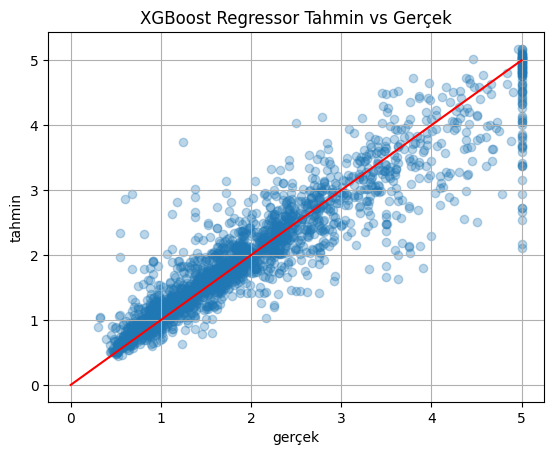

In [5]:
# evaluation
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # squared=False yerine karekök al
r2 = r2_score(y_test, y_pred)

print(f"XGB Regressor RMSE: {rmse}")
print(f"XGB Regressor R2 Score: {r2}")

# gerçek vs tahmin grafiği
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, 5], [0, 5], color="red")
plt.xlabel("gerçek")
plt.ylabel("tahmin")
plt.title("XGBoost Regressor Tahmin vs Gerçek")
plt.grid(True)
plt.show()